# Fit hyper-parameters

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
from matplotlib.pyplot import *
from numpy import *
from positive import *
from nrutils import scsearch, gwylm
from glob import glob
import xcp
from xcp import determine_data_fitting_region,calibration_catalog,metadata_dict,template_amp_phase,advanced_gmvx_plot

(positive)>> Applying custom matplotlib settings.
(init)>> Warm greetings from XCP.
(xcp.core)>> Catalog of calibration runs stored to "xcp.calibration_catalog"
(xcp.core)>> Metadata dictionary for calibration runs stored to "xcp.metadata_dict"
(xcp.core)>> Metadata dictionary for Ed's catalog paper stored to "xcp.catalog_paper_metadata"


## This is notebook is only for scratch code and prototyping

In [2]:
# Load and unpuack physical parameter space
raw_domain = loadtxt('/Users/book/KOALA/PhenomXCP/data/version2/fit_initial_binary_parameters.txt')
theta,m1,m2,eta,delta,chi_eff,chi_p,chi1,chi2,a1,a2,chi1_x,chi1_y,chi1_z,chi2_x,chi2_y,chi2_z = raw_domain.T

# Define desired model domain variables and array 
u = cos(theta)
v = sin(theta)
q = 1.0/eta2q(eta)
model_domain = array( [ u, eta, delta, a1 ] ).T

# Load and unpuack physical parameter space -- dphi
opt_parameter_range = loadtxt('/Users/book/KOALA/PhenomXCP/data/version2/fit_opt_parameters.txt')
mu1, mu2, mu3, nu4, nu5, nu6, zeta1, zeta2 = opt_parameter_range.T


In [3]:
a1 = array( [ round(k,2) for k in a1 ] )

In [4]:
arange(0.2,1,0.2)

array([0.2, 0.4, 0.6, 0.8])

[[<matplotlib.lines.Line2D at 0xa1932d9e8>],

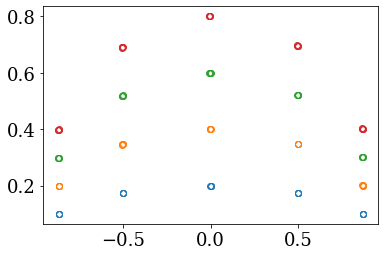

In [5]:
[ plot( u[a1==A1], chi_p[a1==A1], marker='o', ls='none', mfc='none' ) for A1 in (0.2, 0.4, 0.6, 0.8) ]

In [6]:
# Collect set of unique angle values
reference_theta = array([30,60,90,120,150])
degree_point = array([ reference_theta[ argmin( abs(reference_theta-d) ) ] for d in theta*180/pi ])
theta_point = degree_point*pi/180
theta_set = array(sort(list( set(theta_point) )))

In [7]:
# Collect set of unique a1 values
a1_point = around(a1,2)
a1_set = array(sort(list( set(a1_point) )))

# Collect set of unique angle values
degree_point = (around( (theta*180/pi)/10 )*10).astype(int)
theta_point = degree_point*pi/180
theta_set = array(sort(list( set(theta_point) )))

# Collect set of unique mass-ratio values
q_point = around(array([eta2q(n) for n in eta]),2)
q_set = array(sort(list( set(q_point) )))

# Collect set of unique eta values
eta_point = q2eta( q_point )
eta_set = q2eta(q_set)

In [8]:
q_set

array([1., 2., 4., 8.])

In [9]:
eta_set

array([0.25      , 0.22222222, 0.16      , 0.09876543])

In [10]:
degree_point

array([120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120, 120,
       120, 120, 120, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
       150, 150, 150, 150, 150, 150,  90,  90,  90,  90,  90,  90,  90,
        90,  90,  90,  90,  90,  90,  90,  90,  90,  60,  60,  60,  60,
        60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  60,  30,
        30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,  30,
        30,  30])

In [11]:
array(sort(list(set(degree_point))))

array([ 30,  60,  90, 120, 150])

In [12]:
theta_set

array([0.52359878, 1.04719755, 1.57079633, 2.0943951 , 2.61799388])

(gmvpfit)>> Now working deg = 1
&& The estimator has changed by -inf
&& Degree tempering will continue.
&& The current boundary is ['K' '3' '1' '0']
&& The current estimator value is 0.767401

(gmvpfit)>> Now working deg = 2
&& The estimator has changed by -0.185353
&& Degree tempering will continue.
&& The current boundary is ['K' '33' '13' '11' '1' '03' '01' '00' '0']
&& The current estimator value is 0.582049

(gmvpfit)>> Now working deg = 3


/Users/book/opt/anaconda2/envs/hack-phenomx3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/book/opt/anaconda2/envs/hack-phenomx3/lib/python3.6/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


&& The estimator has changed by -0.185913
&& Degree tempering will continue.
&& The current boundary is ['K' '333' '133' '113' '111' '11' '1' '033' '03' '013' '011' '01' '003'
 '001' '00' '0']
&& The current estimator value is 0.396136

(gmvpfit)>> Now working deg = 4
&& The estimator has changed by -0.069732
&& Degree tempering will continue.
&& The current boundary is ['K' '333' '33' '1333' '133' '1133' '113' '1113' '111' '1' '033' '03'
 '0133' '013' '0113' '0111' '0033' '003' '0013' '0011' '001' '0003' '0000'
 '000' '00' '0']
&& The current estimator value is 0.326404

(gmvpfit)>> Now working deg = 5
&& The estimator has changed by -0.046000
&& Degree tempering will continue.
&& The current boundary is ['K' '333' '33' '3' '1333' '11333' '1133' '113' '11133' '1113' '111' '1'
 '033' '01333' '0133' '013' '01133' '0113' '01113' '0111' '011' '01'
 '00333' '003' '00133' '0013' '00113' '00111' '00033' '0003' '0000' '0']
&& The current estimator value is 0.280404

(gmvpfit)>> Now working de

/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:1810: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  subplot( spdim+'1' )
/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:1864: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = ax_array[0] if use_external_axes else subplot(spdim+'1',projection='3d')
/Users/book/JOKI/Libs/KOALA/positive_dev/positive/learning.py:1864: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = ax_array[0] if use_external_axes els

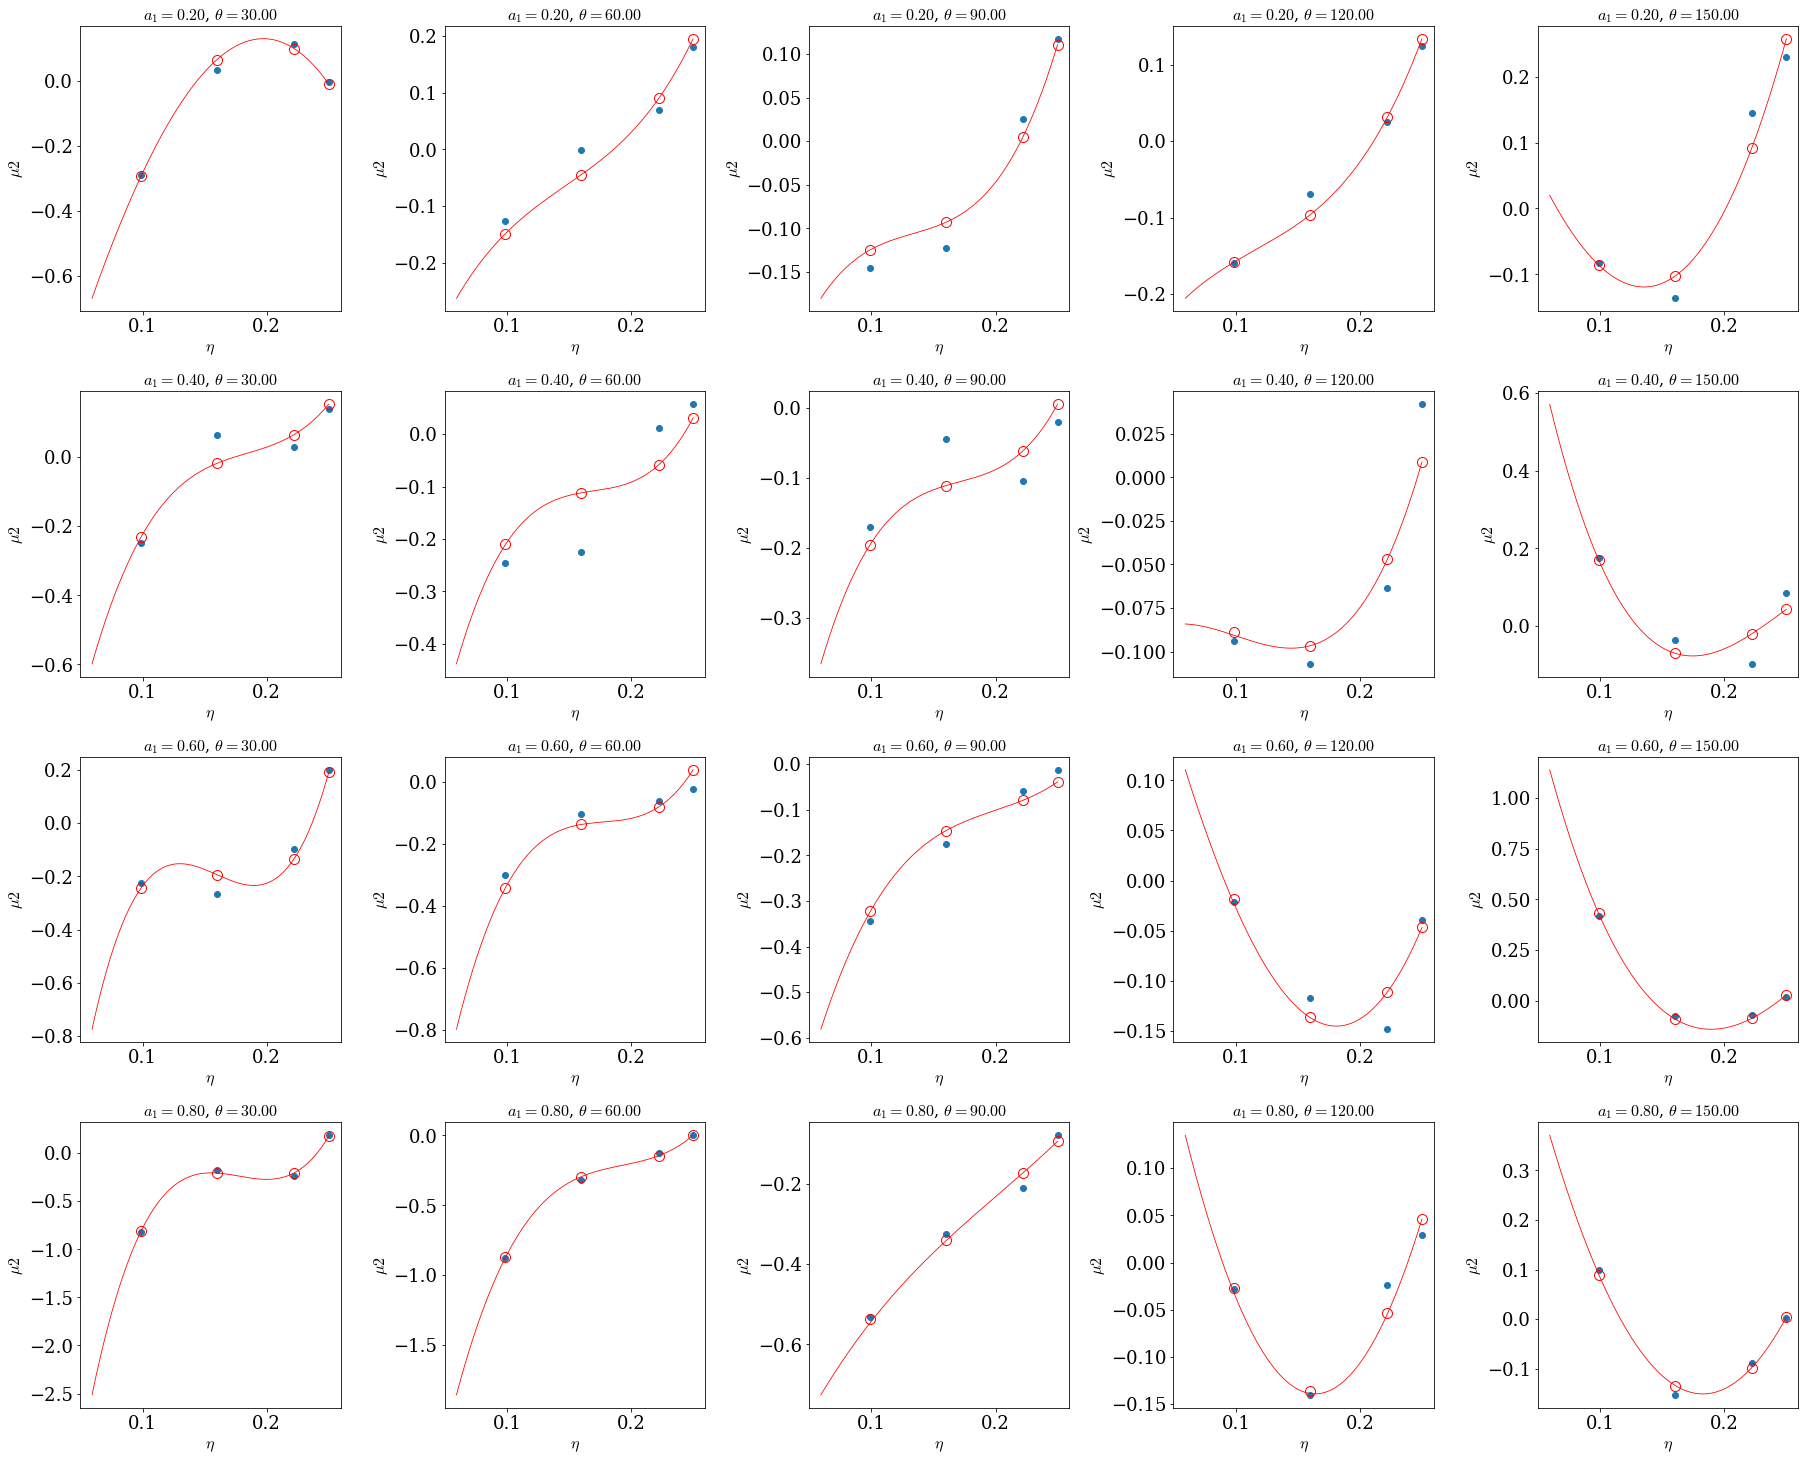

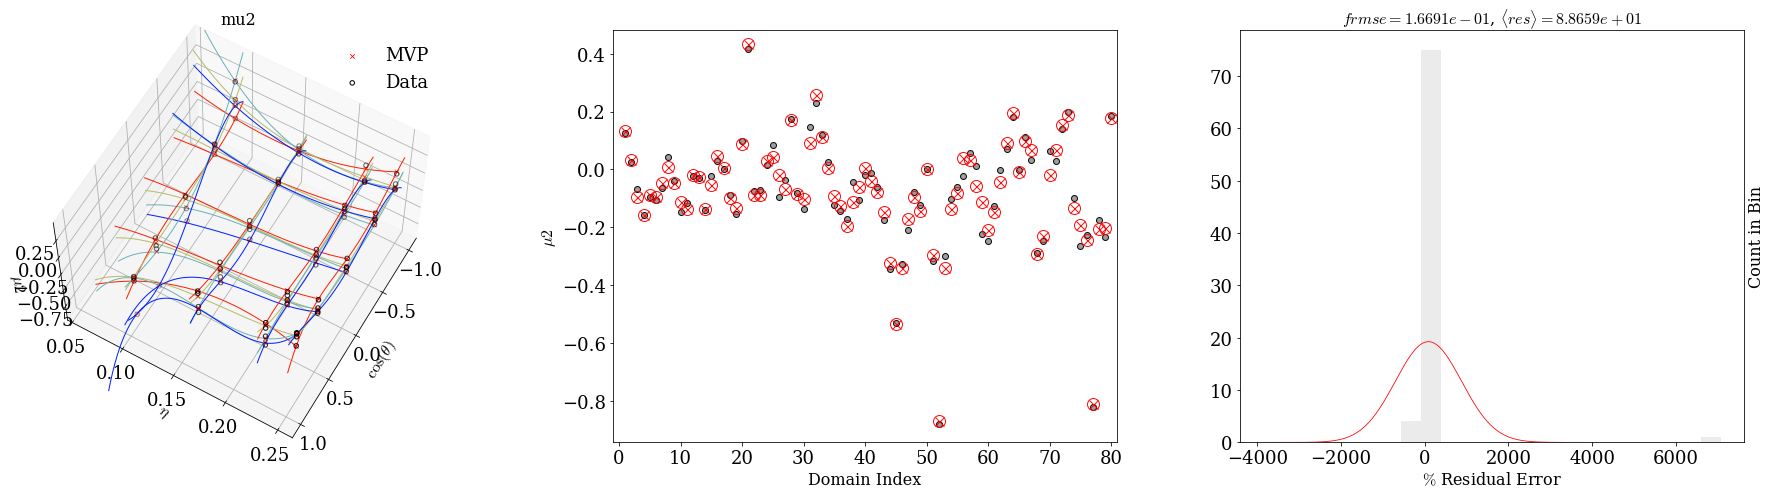

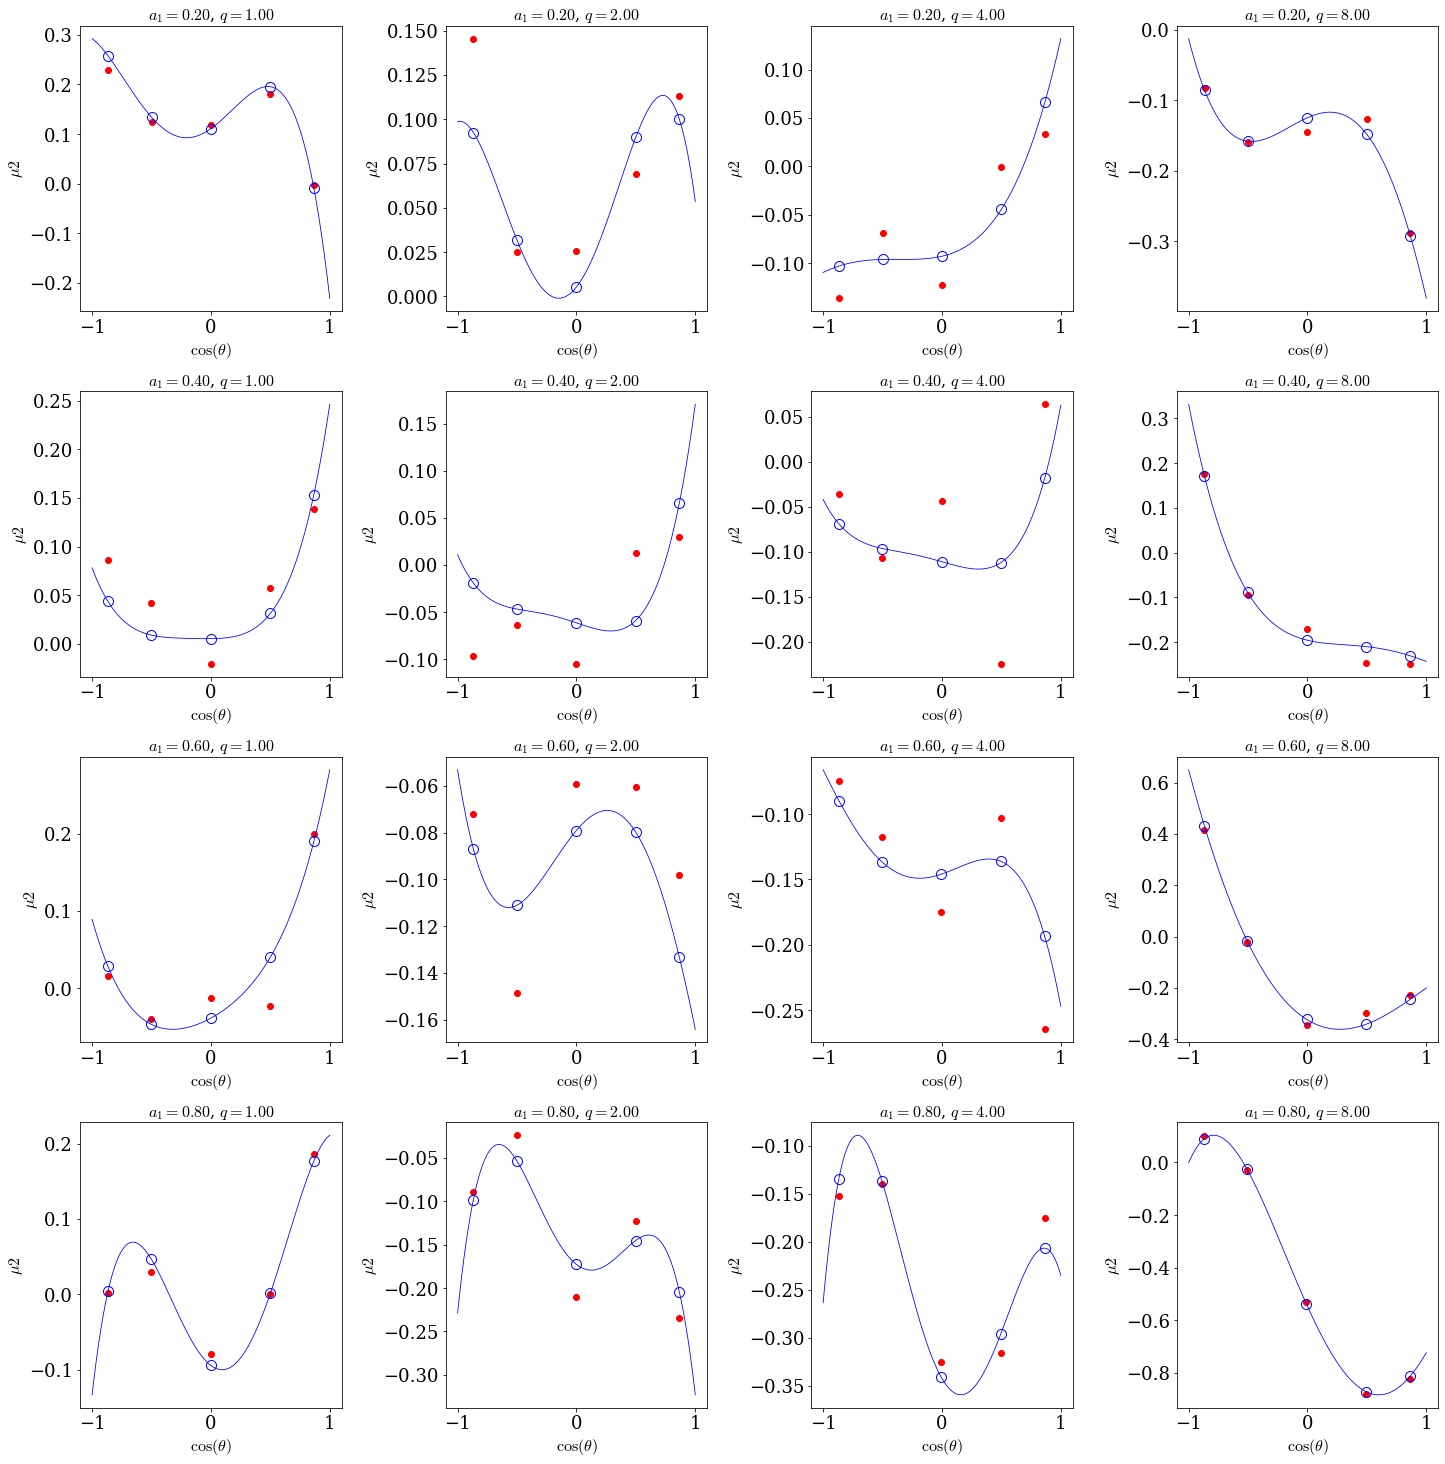

In [17]:

# version 1: u, eta, chi_eff, chi_p
# syntax: 
# nu5, mu2

# version 2: u, eta, a1
# syntax: gmvpfit( trial_model_domain, mu1,fitatol=0.001,verbose=True,maxdeg_list=[4,3,1],center=True)
# nu4, nu6, mu1, mu3, mu4 

'''
* use mvr for nu5, mu2, mu4
'''

#
foo = {}

# # nu4
# # ---
# key = 'nu4'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, nu4,fitatol=0.0001,verbose=True,maxdeg_list=[3,3,0,3],center=True,labels=labels,estatol=0.015)
# advanced_gmvx_plot(foo[key]); show();

# # nu5
# # ---
# key = 'nu5'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, nu5,fitatol=0.0001,verbose=True,maxdeg_list=[4,3,0,3],center=True,labels=labels,estatol=0.015,temper=True)
# advanced_gmvx_plot(foo[key]); show();

# # nu6
# # ---
# key = 'nu6'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, nu6,fitatol=0.0001,verbose=True,maxdeg_list=[2,3,0,3],center=True,labels=labels,estatol=0.03)
# advanced_gmvx_plot(foo[key]); show();
# # advanced_gmvx_plot(foo[key]); show();

# # zeta1
# # ---
# key = 'zeta1'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, zeta1,fitatol=0.0001,verbose=True,maxdeg_list=[4,3,0,3],center=True,labels=labels,estatol=0.05)
# advanced_gmvx_plot(foo[key]); show();

# # zeta2
# # ---
# key = 'zeta2'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, zeta2,fitatol=0.0001,verbose=True,maxdeg_list=[4,0,3,3],center=True,labels=labels,estatol=0.05)
# advanced_gmvx_plot(foo[key]); show();

# # mu1 
# # ---
# key = 'mu1'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, mu1,fitatol=0.0001,verbose=True,maxdeg_list=[4,3,0,3],center=True,labels=labels,estatol=0.01)
# alert( 'The fit has '+bold(str(len(foo[key].basis_symbols)))+' terms.', header=True )
# advanced_gmvx_plot(foo[key]); show();

# mu2 
# ---
key = 'mu2'
labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
foo[key] = gmvpfit( model_domain, mu2,fitatol=0.001,verbose=True,maxdeg_list=[4,3,0,3],center=True,labels=labels,estatol=0.01)
alert( 'The fit has '+bold(str(len(foo[key].basis_symbols)))+' terms.', header=True )
advanced_gmvx_plot(foo[key]); show();

# # mu3  --- SUSPECT
# # ---
# key = 'mu3'
# labels={'python':[key,('u', 'eta', 'delta', 'a1'),''],'latex':['\\'+key,(r'\cos(\theta)', r'\eta', r'\delta', r'a_1'),'']}
# foo[key] = gmvpfit( model_domain, mu3,fitatol=0.0001,verbose=True,maxdeg_list=[4,3,0,1],center=True,estatol=0.005,labels=labels)
# advanced_gmvx_plot(foo[key]); show();

